In [3]:
import pandas as pd
import numpy as np


In [5]:
data = pd.read_csv("Authors_dataset.csv")
df = data.copy()
df

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP
19575,id08973,The lids clenched themselves together as if in...,EAP
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP
19577,id17513,"For an item of news like this, it strikes us i...",EAP


In [ ]:
df.drop("id",axis=1, inplace= True)


In [21]:
x = df

In [14]:
y = x.iloc[:,-1:]
y

,author
0,EAP
1,HPL
2,EAP
3,MWS
4,HPL
...,...
19574,EAP
19575,EAP
19576,EAP
19577,EAP


In [22]:
x.drop("author",axis=1,inplace=True)


KeyError: "['author'] not found in axis"

In [24]:
x

,text
0,"This process, however, afforded me no means of..."
1,It never once occurred to me that the fumbling...
2,"In his left hand was a gold snuff box, from wh..."
3,How lovely is spring As we looked from Windsor...
4,"Finding nothing else, not even gold, the Super..."
...,...
19574,"I could have fancied, while I looked at it, th..."
19575,The lids clenched themselves together as if in...
19576,"Mais il faut agir that is to say, a Frenchman ..."
19577,"For an item of news like this, it strikes us i..."


In [27]:
# x

In [29]:
x = df

In [30]:
x

,text
0,"This process, however, afforded me no means of..."
1,It never once occurred to me that the fumbling...
2,"In his left hand was a gold snuff box, from wh..."
3,How lovely is spring As we looked from Windsor...
4,"Finding nothing else, not even gold, the Super..."
...,...
19574,"I could have fancied, while I looked at it, th..."
19575,The lids clenched themselves together as if in...
19576,"Mais il faut agir that is to say, a Frenchman ..."
19577,"For an item of news like this, it strikes us i..."


In [31]:
y

,author
0,EAP
1,HPL
2,EAP
3,MWS
4,HPL
...,...
19574,EAP
19575,EAP
19576,EAP
19577,EAP


In [33]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [34]:
tokenizer = RegexpTokenizer(r'\w+')
stopwords_en = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

In [51]:
x

,text
0,this process however afford mean ascertain dim...
1,it never occur fumble might mere mistake
2,in leave hand gold snuff box caper hill cut ma...
3,how lovely spring as look windsor terrace sixt...
4,find nothing else even gold superintendent aba...
...,...
19574,i could fancy i look eminent landscape painter...
19575,the lids clench together spasm
19576,mais il faut agir say frenchman never faint ou...
19577,for item news like strike us coolly receive


In [52]:
y

,author
0,EAP
1,HPL
2,EAP
3,MWS
4,HPL
...,...
19574,EAP
19575,EAP
19576,EAP
19577,EAP


In [39]:
def preprocess(docs):
    tokens = tokenizer.tokenize(docs)
    pure_tokens = [token.lower() for token in tokens if token not in stopwords_en]
    lemma_tokens = [lemmatizer.lemmatize(lemm, pos="v") for lemm in pure_tokens]
    return " ".join(lemma_tokens)



In [41]:
preprocess("Sounding very good")

'sound good'

In [42]:
x["text"] = x["text"].apply(preprocess)

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [66]:
tfidf = TfidfVectorizer()
train_df = tfidf.fit_transform(x_train["text"])
test_df = tfidf.transform(x_test["text"])

In [64]:
test_df.shape

(3916, 18011)

In [65]:
y_test.shape

(3916, 1)

In [58]:
train_df.shape

(15663, 18011)

In [67]:
mnb = MultinomialNB()
mnb.fit(train_df,y_train)

C:\Users\itsre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [72]:
y_pred = mnb.predict(test_df)

In [73]:
y_test.shape

(3916, 1)

In [74]:
y_pred.shape

(3916,)

In [88]:
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test,y_pred)

In [81]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         EAP       0.76      0.90      0.82      1570
         HPL       0.90      0.72      0.80      1071
         MWS       0.85      0.80      0.83      1275

    accuracy                           0.82      3916
   macro avg       0.84      0.81      0.82      3916
weighted avg       0.83      0.82      0.82      3916



In [83]:
accuracy_score(y_test,y_pred)

0.8186925434116445

In [86]:
import seaborn as sns

In [87]:
import matplotlib.pyplot as plt

[Text(0, 0.5, 'EAP'), Text(0, 1.5, 'HPL'), Text(0, 2.5, 'MWS')]

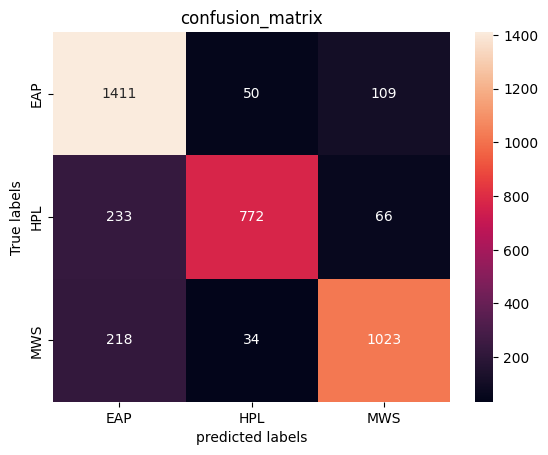

In [89]:
ax = plt.subplot()
sns.heatmap(cm,annot=True,fmt="g",ax = ax);

ax.set_xlabel("predicted labels")
ax.set_ylabel("True labels")
ax.set_title("confusion_matrix")
ax.xaxis.set_ticklabels(["EAP","HPL","MWS"])
ax.yaxis.set_ticklabels(["EAP","HPL","MWS"])